In [1]:
import OffsetArrays
using Plots
using Revise
using ProgressMeter
using SparseArrays, LinearAlgebra, IndexedGraphs, Graphs
using IterTools
using DelimitedFiles


# Paper Plots

In [16]:
function read_inference(samp, xmin, xmax, ymin, ymax; obs_inf=true,T=8, d=3, graph = "er", grid_x=21, grid_y=21)
    AUCtitle = obs_inf ? "AUC" : "AUCNO" 
    path = "./dil_lam_$(graph)_$(samp)/"
    yRange = LinRange(ymin,ymax,grid_y)
    xRange = LinRange(xmin,xmax,grid_x)
    path = "./dil_lam_$(graph)_$(samp)/"
    ninf = readdlm("$(path)ninf.txt")
    Fe = readdlm("$(path)Fe.txt")
    #λinfer = readdlm("$(path)infλ.txt")
    #γinfer = readdlm("$(path)infγ.txt")
    AUC = zeros(grid_y,grid_x,T+2)
    Ov = zeros(grid_y,grid_x,T+2)
    L1 = zeros(grid_y,grid_x,T+2)
    MSE = zeros(grid_y,grid_x,T+2)
    for t = 2 : T + 2 
        AUC[:,:,t] .= readdlm("$(path)AUC$(t - 1).txt") 
        Ov[:,:,t] .= readdlm("$(path)Ov$(t - 1).txt") 
        L1[:,:,t] .= readdlm("$(path)L1_$(t - 1).txt") 
        MSE[:,:,t] .= readdlm("$(path)MSE$(t - 1).txt") 
    end
    hiter = heatmap(xRange,yRange,ninf,title="iterations")
    hfe = heatmap(xRange,yRange,Fe,title="Free Energy")
    #hλinfer = heatmap(xRange,yRange,λinfer,title="λ infer")
    #hγinfer = heatmap(xRange,yRange,γinfer,title="γ infer")
    hAUC = Array{Plots.Plot{Plots.GRBackend}}(undef,T+1)
    hOv = Array{Plots.Plot{Plots.GRBackend}}(undef,T+1)
    hL1 = Array{Plots.Plot{Plots.GRBackend}}(undef,T+1)
    hMSE = Array{Plots.Plot{Plots.GRBackend}}(undef,T+1)

    for t = 2 : T + 2 
        hAUC[t-1] = heatmap(xRange,yRange,AUC[:,:,t],title="$(AUCtitle)(t=$(t-2))") 
        hOv[t-1] = heatmap(xRange,yRange,Ov[:,:,t],title="Ov(t=$(t-2))") 
        hL1[t-1] = heatmap(xRange,yRange,L1[:,:,t],title="L1(t=$(t-2))") 
        hMSE[t-1] = heatmap(xRange,yRange,MSE[:,:,t],title="MSE(t=$(t-2))") 
    end
    return hAUC, hOv, hL1, hMSE, hiter, hfe, hλinfer, hγinfer
end

read_inference (generic function with 1 method)

# First Plot: comparison Measures

In [10]:
samp = 20
xmin = ymin = 0.05
xmax = ymax = 0.9
hAUC, hOv, hL1, hMSE, hiter, hfe, hλinfer, hγinfer = read_inference(samp, xmin, xmax, ymin, ymax)
plot(hMSE[1],hMSE[5],hMSE[end],hOv[1],hOv[5],hOv[end],hAUC[1],hAUC[5],hAUC[end], size=(700,600),layout = (3,3),xlabel="γ",ylabel="λ",margin=Plots.mm)
savefig("comp_measures.pdf")

"/home/students/mmariani/git/Epidemble/results/comp_measures.pdf"

# Second Plot: AUC vs AUCNO

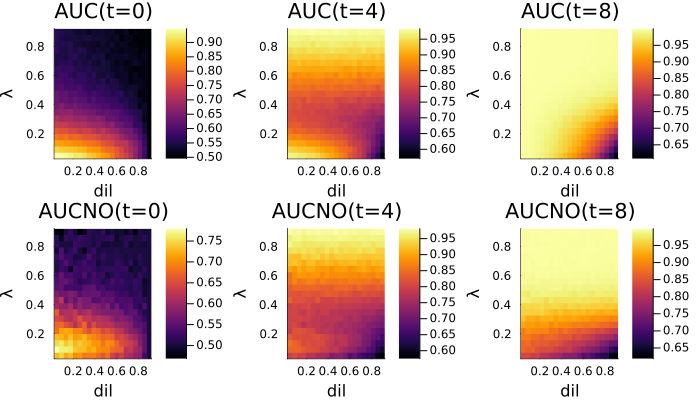

In [23]:
xmin = ymin = 0.05
xmax = ymax = 0.9
samp = 18
hAUCNO, hOv, hL1, hMSE, hiter, hfe, hλinfer, hγinfer = read_inference(samp, xmin, xmax, ymin, ymax,obs_inf=false)
samp = 19
hAUC, hOv, hL1, hMSE, hiter, hfe, hλinfer, hγinfer = read_inference(samp, xmin, xmax, ymin, ymax)
plot(hAUC[1],hAUC[5],hAUC[end],hAUCNO[1],hAUCNO[5],hAUCNO[end], size=(700,400),layout = (2,3),xlabel="dil",ylabel="λ",margin=Plots.mm)
#savefig("AUCvsAUCNO.pdf")

# Third Plot

In [405]:
savefig("./comparison_opt_vs_learn/optimal.pdf")

"/home/students/mmariani/git/Epidemble/results/comparison_opt_vs_learn/optimal.pdf"

In [519]:
λRange

21-element LinRange{Float64, Int64}:
 0.05,0.0925,0.135,0.1775,0.22,0.2625,…,0.6875,0.73,0.7725,0.815,0.8575,0.9

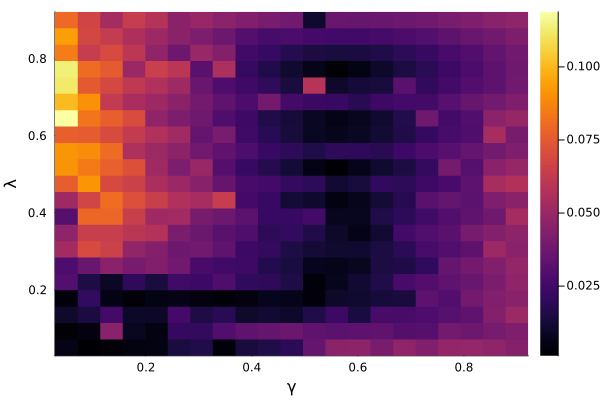

In [606]:
p1=plot(λRange,λRange,width=5,ylabel="λ",label="true")
p1=scatter!(λRange,sum(λinfer,dims=2)/21,label="inferred")
p2=plot(dilRange,dilRange,width=5,ylabel="γ",label="true")
p2=scatter!(dilRange,sum(γinfer,dims=1)'/21,label="inferred")
λtrue = λRange .* ones(size(λinfer))
γtrue = dilRange .* ones(size(γinfer))
hL2 = heatmap(dilRange,λRange,sqrt.((λinfer .- λtrue) .^ 2 + (γinfer .- γtrue') .^ 2 ) ./ sqrt.(λtrue^2 .+ γtrue'^2) ,ylabel="λ",xlabel="γ")
plot(hL2)
#savefig("./inference/InferenceHyper.pdf")

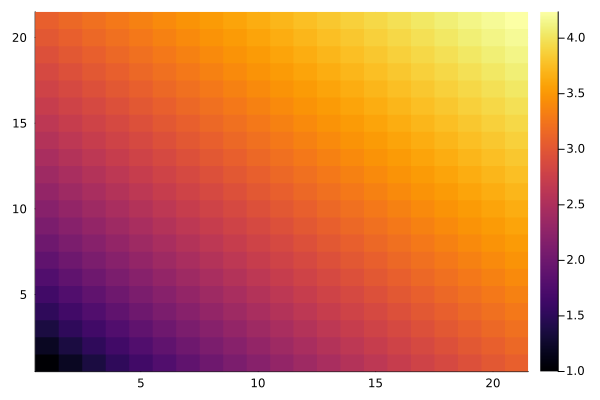

In [602]:
heatmap(sqrt.(λtrue^2 .+ γtrue'^2)  )

In [109]:
hfe = heatmap(dilRange,ni,Fe,title="(b)");
hMSE0 = heatmap(dilRange,ni,MSE[:,:,2],title="(a)") ;

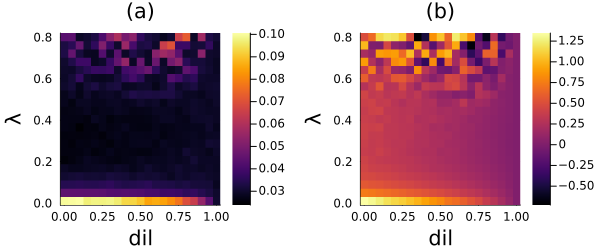

In [88]:
plot(hMSE0, hfe,layout=(1,2), xlabelfontsize=14,ylabelfontsize=14, size=(600,250),ylabel="λ",xlabel="dil",margin=3Plots.mm)

In [89]:
savefig("RSB.pdf")

"/home/students/mmariani/git/Epidemble/results/RSB.pdf"

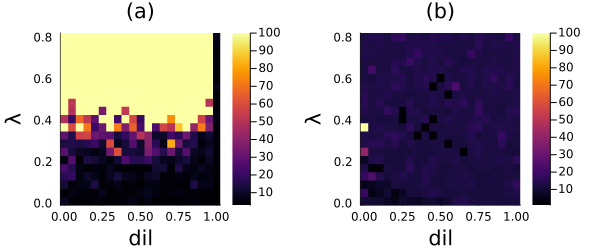

In [85]:
graph = "er"
samp = 8;
grid_λ = 21
grid_dil = 21
λRange = LinRange(0.01,0.8,grid_λ)
dilRange = LinRange(0.0,1.0,grid_dil)
path = "./dil_lam_$(graph)_$(samp)/"
iters = readdlm("$(path)ninf.txt")
hRSB = heatmap(dilRange,λRange,iters,title="(a)")
samp = 11;
path = "./dil_lam_$(graph)_$(samp)/"
iters = readdlm("$(path)ninf.txt")
hLearn = heatmap(dilRange,λRange,iters,title="(b)")
plot(hRSB,hLearn,size=(600,250),xlabelfontsize=14,ylabelfontsize=14,xlabel="dil",ylabel="λ",margin=3Plots.mm)

In [86]:
savefig("iters.pdf")

"/home/students/mmariani/git/Epidemble/results/iters.pdf"

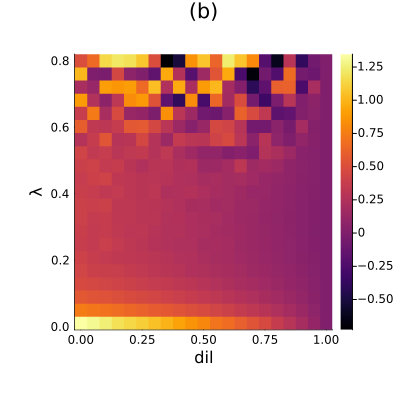

In [71]:
plot(hfe, size=(400,400),ylabel="λ",xlabel="dil",margin=5Plots.mm)

In [164]:
savefig("$(path)lamVS SLEARN.pdf")

"/home/students/mmariani/git/Epidemble/results/dil_lam_er_13/gamVSlamLEARN.pdf"

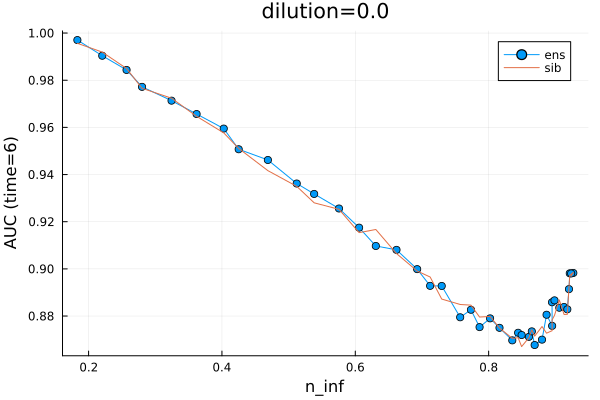

In [48]:
graph = "er"
samp = 1
ni = readdlm("./infected/ni_$(graph)_T=$(T)_d=$(d)_lam0.01_1.0.txt")
using Interpolations
itp = LinearInterpolation(LinRange(0.01,1,100),vec(ni));
ni = [itp(t) for t in LinRange(0.01,0.4,41)];
dil = [0,0.5]
pathtest = "../test/AUCsibyl/"
name = Dict("er" => "poisson", "rr" => "regular")

t = 6
s = 1
a = readdlm("dil_lam_$(graph)_$(samp)/AUC$(t).txt")
p1 = plot(ni,a[:,s],marker=:c,ylabel="AUC (time=$t)",label="ens",xlabel="n_inf",title="dilution=$(dil[s])")
b = readdlm("$(pathtest)$(name[graph])_AUC$(t)_dil_$(dil[s]).txt")
p1 = plot!(ni,b,ylabel="AUC (time=$t)",label="sib",xlabel="n_inf",title="dilution=$(dil[s])")

t = 5
a = readdlm("dil_lam_$(graph)_$(samp)/AUC$(t).txt")
p2 = plot(ni,a[:,s],marker=:c,label="ens",ylabel="AUC (time=$t)",xlabel="n_inf",title="dilution=$(dil[s])")
b = readdlm("$(pathtest)$(name[graph])_AUC$(t)_dil_$(dil[s]).txt")
p2 = plot!(ni,b,ylabel="AUC (time=$t)",label="sib",xlabel="n_inf",title="dilution=$(dil[s])")

a = readdlm("dil_lam_$(graph)_$(samp)/diag.txt")
p3 = plot(ni,a[:,s],marker=:c,label="ens",ylabel="diagonal",xlabel="n_inf",title="dilution=$(dil[s])")
b = readdlm("$(pathtest)$(name[graph])_diag_dil_$(dil[s]).txt")
p3 = plot!(ni,b,xlabel="n_inf",label="sib",title="dilution=$(dil[s])")



pM1 = plot(p1,markersize=2)

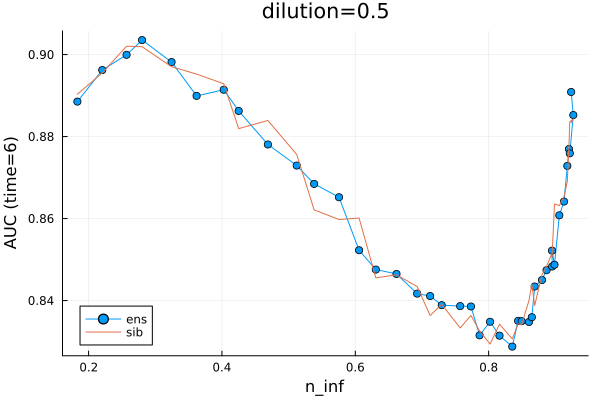

In [49]:
ni = readdlm("./infected/ni_$(graph)_T=$(T)_d=$(d)_lam0.01_1.0.txt")
using Interpolations
itp = LinearInterpolation(LinRange(0.01,1,100),vec(ni));
ni = [itp(t) for t in LinRange(0.01,0.4,41)];
dil = [0,0.5]

pathtest = "../test/AUCsibyl/"


t = 6
s = 2
a = readdlm("dil_lam_$(graph)_$(samp)/AUC$(t).txt")
p4 = plot(ni,a[:,s],marker=:c,ylabel="AUC (time=$t)",label="ens",xlabel="n_inf",title="dilution=$(dil[s])")
b = readdlm("$(pathtest)$(name[graph])_AUC$(t)_dil_$(dil[s]).txt")
p4 = plot!(ni,b,ylabel="AUC (time=$t)",label="sib",xlabel="n_inf",title="dilution=$(dil[s])")

t = 6
a = readdlm("dil_lam_$(graph)_$(samp)/AUC$(t).txt")
p5 = plot(ni,a[:,s],marker=:c,label="ens",ylabel="AUC (time=$t)",xlabel="n_inf",title="dilution=$(dil[s])")
b = readdlm("$(pathtest)$(name[graph])_AUC$(t)_dil_$(dil[s]).txt")
p5 = plot!(ni,b,ylabel="AUC (time=$t)",label="sib",xlabel="n_inf",title="dilution=$(dil[s])")

a = readdlm("dil_lam_$(graph)_$(samp)/diag.txt")
p6 = plot(ni,a[:,s],marker=:c,label="ens",ylabel="diagonal",xlabel="n_inf",title="dilution=$(dil[s])")
b = readdlm("$(pathtest)$(name[graph])_diag_dil_$(dil[s]).txt")
p6 = plot!(ni,b,xlabel="n_inf",label="sib",title="dilution=$(dil[s])")



pM2 = plot(p4,markersize=2)

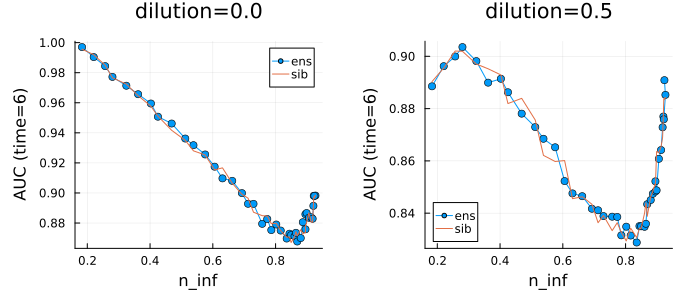

In [40]:
plot(pM1,pM2,layout=(1,2),size=(700,300),margin=5Plots.mm)

In [41]:
savefig("dil_lam_er_1/sib_vs_ens.pdf")

"/home/students/mmariani/git/Epidemble/results/dil_lam_er_1/sib_vs_ens.pdf"